In [329]:
# Ch02. Introduction to Computer Vision - 2
# Using Callbacks to prevent overfitting

# my_test : plotting accuracy with pyplot

In [330]:
import tensorflow as tf
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [331]:
# training automatically stops when accuracy exceeds 0.95
# name is important. on_epoch_end(), on_train_begin()
class myCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric]=[]
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy')>0.9:
            print("\nReached 95% accuracy, stopping training")
            self.model.stop_training=True
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

            metrics = [x for x in logs if 'val' not in x]

            f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
            clear_output(wait=True)

            for i, metric in enumerate(metrics):
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['loss'],
                            label=metric)

                axs[i].legend()
                axs[i].grid()

            plt.tight_layout()
            plt.show()

In [332]:
# How Tensorflow callbacks work:
# https://medium.com/geekculture/how-to-plot-model-loss-while-training-in-tensorflow-9fa1a1875a5

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

In [333]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [334]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [335]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [336]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

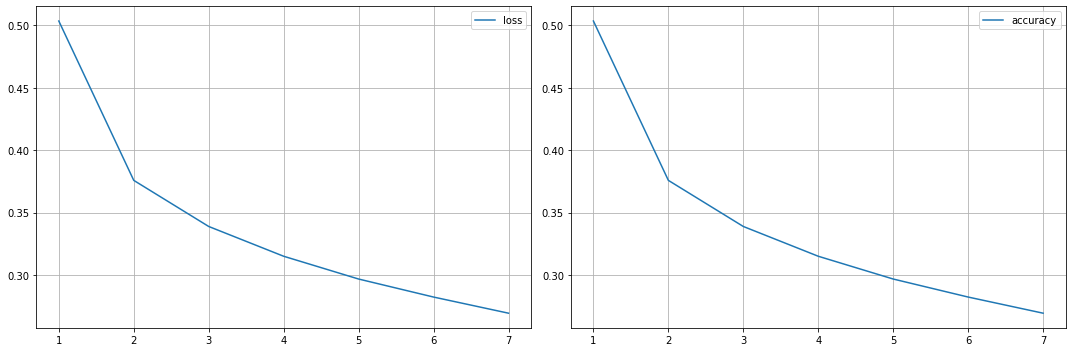

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2694 - accuracy: 0.9003


In [337]:
model.fit(training_images,training_labels,epochs=50,callbacks=[callbacks])
